In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_excel('FoodAccessResearchAtlasData2019.xlsx')
data_df.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.000000,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.681219,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [3]:
mn_df = data_df[data_df['State'] == 'Minnesota']
mn_df

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
35210,27001790502,Minnesota,Aitkin County,0,3262,1494,0,7.0,0.214592,0,...,1032.0,3188.0,10.0,8.0,1.0,19.0,36.0,13.0,52.0,83.0
35211,27001770200,Minnesota,Aitkin County,0,2336,995,0,11.0,0.470890,1,...,467.0,2231.0,18.0,2.0,0.0,37.0,48.0,26.0,33.0,184.0
35212,27001790501,Minnesota,Aitkin County,0,1957,916,0,11.0,0.562085,1,...,613.0,1913.0,4.0,1.0,1.0,19.0,19.0,14.0,38.0,58.0
35213,27001770100,Minnesota,Aitkin County,0,2327,1080,0,5.0,0.214869,1,...,668.0,2255.0,3.0,4.0,1.0,45.0,19.0,16.0,44.0,62.0
35214,27001770400,Minnesota,Aitkin County,0,3052,1424,0,0.0,0.000000,1,...,803.0,2758.0,3.0,5.0,0.0,233.0,53.0,36.0,88.0,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36539,27171100702,Minnesota,Wright County,1,8207,2916,0,48.0,0.584867,0,...,557.0,7703.0,71.0,91.0,3.0,47.0,292.0,299.0,150.0,286.0
36540,27173970300,Minnesota,Yellow Medicine County,0,2517,1044,0,49.0,1.946762,0,...,467.0,2452.0,2.0,5.0,0.0,11.0,47.0,64.0,30.0,67.0
36541,27173970200,Minnesota,Yellow Medicine County,0,2520,1075,0,122.0,4.841270,0,...,641.0,2479.0,6.0,7.0,0.0,1.0,27.0,44.0,63.0,105.0
36542,27173970400,Minnesota,Yellow Medicine County,0,2030,794,0,1.0,0.049261,1,...,297.0,1920.0,1.0,6.0,5.0,31.0,67.0,170.0,30.0,58.0


In [4]:
grouped_df = mn_df[["County", "Urban", "Pop2010", "OHU2010",
                            "GroupQuartersFlag", "NUMGQTRS", "PCTGQTRS", "HUNVFlag", "LowIncomeTracts", 
                            "PovertyRate", "MedianFamilyIncome", "TractLOWI", "TractKids", "TractSeniors", 
                            "TractWhite", "TractBlack", "TractAsian", "TractNHOPI", "TractAIAN", 
                            "TractOMultir", "TractHispanic", "TractHUNV", "TractSNAP", "LAhalfand10"]]
grouped_df.head()

,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,HUNVFlag,LowIncomeTracts,PovertyRate,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,LAhalfand10
35210,Aitkin County,0,3262,1494,0,7.0,0.214592,0,1,7.623169,...,3188.0,10.0,8.0,1.0,19.0,36.0,13.0,52.0,83.0,0
35211,Aitkin County,0,2336,995,0,11.0,0.470890,0,1,11.283691,...,2231.0,18.0,2.0,0.0,37.0,48.0,26.0,33.0,184.0,1
35212,Aitkin County,0,1957,916,0,11.0,0.562085,0,1,11.358811,...,1913.0,4.0,1.0,1.0,19.0,19.0,14.0,38.0,58.0,1
35213,Aitkin County,0,2327,1080,0,5.0,0.214869,0,1,12.527473,...,2255.0,3.0,4.0,1.0,45.0,19.0,16.0,44.0,62.0,1
35214,Aitkin County,0,3052,1424,0,0.0,0.000000,0,1,15.459098,...,2758.0,3.0,5.0,0.0,233.0,53.0,36.0,88.0,184.0,1


In [5]:
grouped_df.isnull().sum()

County                0
Urban                 0
Pop2010               0
OHU2010               0
GroupQuartersFlag     0
NUMGQTRS              0
PCTGQTRS              0
HUNVFlag              0
LowIncomeTracts       0
PovertyRate           0
MedianFamilyIncome    8
TractLOWI             0
TractKids             0
TractSeniors          0
TractWhite            0
TractBlack            0
TractAsian            0
TractNHOPI            0
TractAIAN             0
TractOMultir          0
TractHispanic         0
TractHUNV             0
TractSNAP             0
LAhalfand10           0
dtype: int64

In [6]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 35210 to 36543
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   County              1334 non-null   object 
 1   Urban               1334 non-null   int64  
 2   Pop2010             1334 non-null   int64  
 3   OHU2010             1334 non-null   int64  
 4   GroupQuartersFlag   1334 non-null   int64  
 5   NUMGQTRS            1334 non-null   float64
 6   PCTGQTRS            1334 non-null   float64
 7   HUNVFlag            1334 non-null   int64  
 8   LowIncomeTracts     1334 non-null   int64  
 9   PovertyRate         1334 non-null   float64
 10  MedianFamilyIncome  1326 non-null   float64
 11  TractLOWI           1334 non-null   float64
 12  TractKids           1334 non-null   float64
 13  TractSeniors        1334 non-null   float64
 14  TractWhite          1334 non-null   float64
 15  TractBlack          1334 non-null   float64
 16  T

In [7]:
grouped_df.loc[(grouped_df["MedianFamilyIncome"].isnull()), ["County", "MedianFamilyIncome"]]


,County,MedianFamilyIncome
35842,Hennepin County,NaN
35867,Hennepin County,NaN
35880,Hennepin County,NaN
35883,Hennepin County,NaN
35884,Hennepin County,NaN
36117,Ramsey County,NaN
36458,Washington County,NaN
36459,Washington County,NaN


In [8]:
median = grouped_df.loc[grouped_df["County"] == "Hennepin County"]["MedianFamilyIncome"].median()
median

95140.5

In [9]:
grouped_df.loc[(grouped_df["MedianFamilyIncome"].isnull()) & (grouped_df["County"] == "Hennepin County"), "MedianFamilyIncome"] = median

In [10]:
grouped_df.loc[(grouped_df["MedianFamilyIncome"].isnull()) | (grouped_df["County"] == "Hennepin County"), ["County", "MedianFamilyIncome"]]


,County,MedianFamilyIncome
35586,Hennepin County,157891.0
35587,Hennepin County,165500.0
35588,Hennepin County,135417.0
35589,Hennepin County,196845.0
35590,Hennepin County,94792.0
...,...,...
35883,Hennepin County,95140.5
35884,Hennepin County,95140.5
36117,Ramsey County,NaN
36458,Washington County,NaN


In [11]:
median2 = grouped_df.loc[grouped_df["County"] == "Washington County"]["MedianFamilyIncome"].median()
median2

106858.0

In [12]:
grouped_df.loc[(grouped_df["MedianFamilyIncome"].isnull()) & (grouped_df["County"] == "Washington County"), "MedianFamilyIncome"] = median2

In [13]:
median3 = grouped_df.loc[grouped_df["County"] == "Ramsey County"]["MedianFamilyIncome"].median()
median3

76914.0

In [14]:
grouped_df.loc[(grouped_df["MedianFamilyIncome"].isnull()) & (grouped_df["County"] == "Ramsey County"), "MedianFamilyIncome"] = median3

In [15]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 35210 to 36543
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   County              1334 non-null   object 
 1   Urban               1334 non-null   int64  
 2   Pop2010             1334 non-null   int64  
 3   OHU2010             1334 non-null   int64  
 4   GroupQuartersFlag   1334 non-null   int64  
 5   NUMGQTRS            1334 non-null   float64
 6   PCTGQTRS            1334 non-null   float64
 7   HUNVFlag            1334 non-null   int64  
 8   LowIncomeTracts     1334 non-null   int64  
 9   PovertyRate         1334 non-null   float64
 10  MedianFamilyIncome  1334 non-null   float64
 11  TractLOWI           1334 non-null   float64
 12  TractKids           1334 non-null   float64
 13  TractSeniors        1334 non-null   float64
 14  TractWhite          1334 non-null   float64
 15  TractBlack          1334 non-null   float64
 16  T

In [16]:
print(grouped_df.dtypes)

County                 object
Urban                   int64
Pop2010                 int64
OHU2010                 int64
GroupQuartersFlag       int64
NUMGQTRS              float64
PCTGQTRS              float64
HUNVFlag                int64
LowIncomeTracts         int64
PovertyRate           float64
MedianFamilyIncome    float64
TractLOWI             float64
TractKids             float64
TractSeniors          float64
TractWhite            float64
TractBlack            float64
TractAsian            float64
TractNHOPI            float64
TractAIAN             float64
TractOMultir          float64
TractHispanic         float64
TractHUNV             float64
TractSNAP             float64
LAhalfand10             int64
dtype: object


In [17]:
grouped_df.nunique()

County                  87
Urban                    2
Pop2010               1190
OHU2010                989
GroupQuartersFlag        2
NUMGQTRS               278
PCTGQTRS              1088
HUNVFlag                 2
LowIncomeTracts          2
PovertyRate           1328
MedianFamilyIncome    1269
TractLOWI              963
TractKids              887
TractSeniors           702
TractWhite            1161
TractBlack             503
TractAsian             424
TractNHOPI              20
TractAIAN              167
TractOMultir           429
TractHispanic          446
TractHUNV              336
TractSNAP              378
LAhalfand10              2
dtype: int64

In [18]:
# Convert population counts to percentages for demographic observations
grouped_df["PctLOWI"] = grouped_df["TractLOWI"] / grouped_df["Pop2010"]
grouped_df["PctKids"] = grouped_df["TractKids"] / grouped_df["Pop2010"]
grouped_df["PctSeniors"] = grouped_df["TractSeniors"] / grouped_df["Pop2010"]
grouped_df["PctWhite"] = grouped_df["TractWhite"] / grouped_df["Pop2010"]
grouped_df["PctBlack"] = grouped_df["TractBlack"] / grouped_df["Pop2010"]
grouped_df["PctAsian"] = grouped_df["TractAsian"] / grouped_df["Pop2010"]
grouped_df["PctNHOPI"] = grouped_df["TractNHOPI"] / grouped_df["Pop2010"]
grouped_df["PctAIAN"] = grouped_df["TractAIAN"] / grouped_df["Pop2010"]
grouped_df["PctOMultir"] = grouped_df["TractOMultir"] / grouped_df["Pop2010"]
grouped_df["PctHispanic"] = grouped_df["TractHispanic"] / grouped_df["Pop2010"]
grouped_df["PctHUNV"] = grouped_df["TractHUNV"] / grouped_df["Pop2010"]
grouped_df["PctSNAP"] = grouped_df["TractSNAP"] / grouped_df["Pop2010"]



C:\Users\Micha\AppData\Local\Temp\ipykernel_11112\1782347657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["PctLOWI"] = grouped_df["TractLOWI"] / grouped_df["Pop2010"]
C:\Users\Micha\AppData\Local\Temp\ipykernel_11112\1782347657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["PctKids"] = grouped_df["TractKids"] / grouped_df["Pop2010"]
C:\Users\Micha\AppData\Local\Temp\ipykernel_11112\1782347657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [19]:
# drop columns with population counts
grouped_df.drop(columns=['TractLOWI','TractKids','TractSeniors','TractWhite','TractBlack','TractAsian','TractNHOPI',
                         'TractAIAN','TractOMultir','TractHispanic','TractHUNV','TractSNAP'], inplace=True)

C:\Users\Micha\AppData\Local\Temp\ipykernel_11112\464002592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df.drop(columns=['TractLOWI','TractKids','TractSeniors','TractWhite','TractBlack','TractAsian','TractNHOPI',


In [20]:
list(grouped_df.columns)

['County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'GroupQuartersFlag',
 'NUMGQTRS',
 'PCTGQTRS',
 'HUNVFlag',
 'LowIncomeTracts',
 'PovertyRate',
 'MedianFamilyIncome',
 'LAhalfand10',
 'PctLOWI',
 'PctKids',
 'PctSeniors',
 'PctWhite',
 'PctBlack',
 'PctAsian',
 'PctNHOPI',
 'PctAIAN',
 'PctOMultir',
 'PctHispanic',
 'PctHUNV',
 'PctSNAP']

In [21]:
# Convert categorical data to numeric with `pd.get_dummies`  ***

grouped_df.drop(columns=["County"], inplace=True)
dummies_df = pd.get_dummies(grouped_df)
dummies_df

C:\Users\Micha\AppData\Local\Temp\ipykernel_11112\3822044187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df.drop(columns=["County"], inplace=True)


,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,...,PctSeniors,PctWhite,PctBlack,PctAsian,PctNHOPI,PctAIAN,PctOMultir,PctHispanic,PctHUNV,PctSNAP
35210,0,3262,1494,0,7.0,0.214592,0,1,7.623169,63287.0,...,0.316370,0.977315,0.003066,0.002452,0.000307,0.005825,0.011036,0.003985,0.015941,0.025445
35211,0,2336,995,0,11.0,0.470890,0,1,11.283691,63073.0,...,0.199914,0.955051,0.007705,0.000856,0.000000,0.015839,0.020548,0.011130,0.014127,0.078767
35212,0,1957,916,0,11.0,0.562085,0,1,11.358811,54821.0,...,0.313235,0.977517,0.002044,0.000511,0.000511,0.009709,0.009709,0.007154,0.019417,0.029637
35213,0,2327,1080,0,5.0,0.214869,0,1,12.527473,57813.0,...,0.287065,0.969059,0.001289,0.001719,0.000430,0.019338,0.008165,0.006876,0.018908,0.026644
35214,0,3052,1424,0,0.0,0.000000,0,1,15.459098,53309.0,...,0.263106,0.903670,0.000983,0.001638,0.000000,0.076343,0.017366,0.011796,0.028834,0.060288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36539,1,8207,2916,0,48.0,0.584867,1,0,10.240964,80273.0,...,0.067869,0.938589,0.008651,0.011088,0.000366,0.005727,0.035579,0.036432,0.018277,0.034848
36540,0,2517,1044,0,49.0,1.946762,0,0,8.866583,72917.0,...,0.185538,0.974176,0.000795,0.001986,0.000000,0.004370,0.018673,0.025427,0.011919,0.026619
36541,0,2520,1075,0,122.0,4.841270,0,0,11.030741,70066.0,...,0.254365,0.983730,0.002381,0.002778,0.000000,0.000397,0.010714,0.017460,0.025000,0.041667
36542,0,2030,794,0,1.0,0.049261,0,1,12.297893,64483.0,...,0.146305,0.945813,0.000493,0.002956,0.002463,0.015271,0.033005,0.083744,0.014778,0.028571


In [22]:
# Split our preprocessed data into our features and target arrays 
y = dummies_df.LAhalfand10.values
X = dummies_df.drop(columns="LAhalfand10").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
# Create a StandardScaler instances ****
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### When the model below was first created and trained, "Accuracy" results were coming back at around 30%.
#### Something had to be incorrect somewhere. First checked the dataset and discovered there were 8 places where
#### "MedianFamilyIncome" was NaN spread across 3 different Minnesota counties. Used the .median() method above to fill in the 
#### NaN fields.

#### Also, when looking at the .value_counts() from dummies, typically "0" count should be higher then "1" if nothing else, but even
#### still, the data did not appear to be too balanced, so wasn't sure if that was going to be a challenge.

#### Next, created "First" and "Second" hidden layers with hidden_nodes_layer1 at 800 and ...layer2 at 500 and epochs below at 
#### 100. After running evertyhing, "Accuracy" was around 75%-76%! When training, the model did seem to be overfitting, so bumped 
#### the epochs down to 10. Also tried adding a "Third" hidden layer with 50 nodes, and "Accuracy" was still coming out at 76%-77%. 

#### Removed the first hidden layer below and also removed the "County" column and then saw "Accuracy" jump to 85.6%.
#### Lastly, we converted the population from "counts" to "percents" and that brought the "Accuracy" up to .....

#### When reviewing with the group, we decided that the population counts would be better being shown as percentages instead of totals. Unsure of how this would affect the model, we did decide 

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
# hidden_nodes_layer1 =  300
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu", input_dim=number_input_features))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2300      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 12501 (48.83 KB)
Trainable params: 12501 (48.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
dummies_df["LAhalfand10"].value_counts() #dataset is imbalanced, usually 0 should be higher than 1

1    940
0    394
Name: LAhalfand10, dtype: int64

In [27]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.5518 - accuracy: 0.7310
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8260
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8500
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8480
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.8580
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8650
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.8780
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.8800
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.8740
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.8840


In [28]:
type(fit_model)

keras.src.callbacks.History

In [29]:
fit_model.history  #plot loss function

{'loss': [0.551759660243988,
  0.39663368463516235,
  0.33751380443573,
  0.3128678798675537,
  0.29678013920783997,
  0.2864611744880676,
  0.2743099331855774,
  0.2662493586540222,
  0.26462191343307495,
  0.255810022354126],
 'accuracy': [0.7310000061988831,
  0.8259999752044678,
  0.8500000238418579,
  0.8479999899864197,
  0.8579999804496765,
  0.8650000095367432,
  0.878000020980835,
  0.8799999952316284,
  0.8740000128746033,
  0.8840000033378601]}

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - loss: 0.3661 - accuracy: 0.8503 - 103ms/epoch - 9ms/step
Loss: 0.36611202359199524, Accuracy: 0.8502994179725647


In [31]:
grouped_df.columns.tolist()

['Urban',
 'Pop2010',
 'OHU2010',
 'GroupQuartersFlag',
 'NUMGQTRS',
 'PCTGQTRS',
 'HUNVFlag',
 'LowIncomeTracts',
 'PovertyRate',
 'MedianFamilyIncome',
 'LAhalfand10',
 'PctLOWI',
 'PctKids',
 'PctSeniors',
 'PctWhite',
 'PctBlack',
 'PctAsian',
 'PctNHOPI',
 'PctAIAN',
 'PctOMultir',
 'PctHispanic',
 'PctHUNV',
 'PctSNAP']

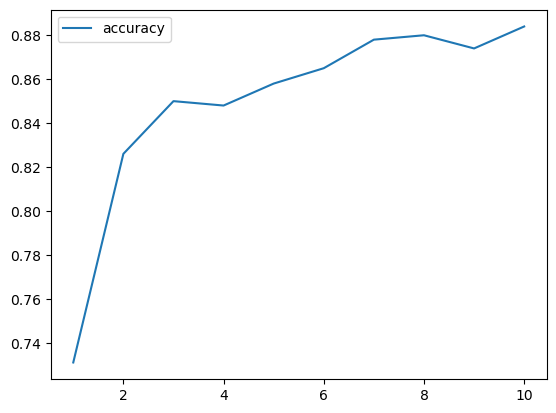

In [32]:
# Create a DataFrame containing training history
plot_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
plot_df.plot(y="accuracy")
plt.show()

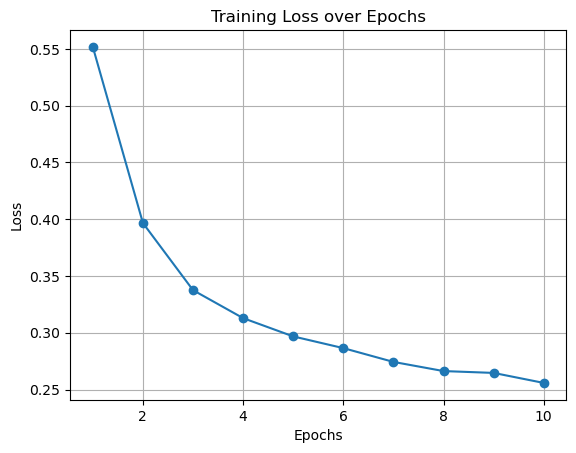

In [33]:
loss_values = fit_model.history['loss']

epochs_range = range(1, len(loss_values) + 1)

plt.plot(epochs_range, loss_values, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()